In [ ]:
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('world_data_full_apply_nulos.csv', index_col=0)

In [3]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


# INTRUCCIONES

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
Media
Mediana
Desviación estándar
Mínimo
Máximo

2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [4]:
# 1. 
numerical_df = df.select_dtypes(include=['number'])

In [10]:
media = numerical_df.mean()

In [11]:
mediana = numerical_df.median()

In [13]:
desviacion_estandar = numerical_df.std()

In [14]:
minimo = numerical_df.min()

In [15]:
maximo = numerical_df.max()

In [16]:
resumen = pd.DataFrame({
    'Media': media,
    'Mediana': mediana,
    'Desviación Estándar': desviacion_estandar,
    'Mínimo': minimo,
    'Máximo': maximo
})

print(resumen) 

                                             Media       Mediana  \
density                               1.345045e+02  8.300000e+01   
agricultural_land                     3.911755e+01  3.960000e+01   
land_area                             2.552127e+02  1.484600e+02   
armed_forces_size                     1.037831e+02  2.850000e+01   
birth_rate                            2.021497e+01  1.795000e+01   
calling_code                          3.605464e+02  2.555000e+02   
co2-emissions                         1.259155e+02  3.447700e+01   
cpi                                   1.441936e+02  1.247400e+02   
cpi_change                            6.722346e+00  2.300000e+00   
fertility_rate                        2.698138e+00  2.245000e+00   
forested_area                         3.201543e+01  3.200000e+01   
gasoline_price                        1.002457e+00  9.800000e-01   
gdp                                   4.772959e+11  3.438723e+10   
gross_primary_education_enrollment    1.024702e+

In [17]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

In [18]:
# 2. 
# Calcular densidad de población y encontrar países directamente
mayor_densidad = df.loc[(df['population'] / df['land_area']).idxmax(), 'country']
menor_poblacion = df.loc[df['population'].idxmin(), 'country']

print(f"País con mayor densidad de población: {mayor_densidad}")
print(f"País con menor población: {menor_poblacion}")


País con mayor densidad de población: Vatican City
País con menor población: Nauru


In [19]:
# 3. 
# Calcular la tasa promedio de natalidad
tasa_promedio_natalidad = df['birth_rate'].mean()

print(f"Tasa promedio de natalidad: {tasa_promedio_natalidad:.2f}")

Tasa promedio de natalidad: 20.21


In [20]:
# 4. 
# Definir las categorías según la tasa de mortalidad infantil
def clasificar_mortalidad(tasa):
    if tasa < 10:
        return 'Baja'
    elif 10 <= tasa <= 30:
        return 'Moderada'
    else:
        return 'Alta'

In [21]:
# Aplicar la clasificación a la columna 'infant_mortality'
df['Mortalidad_Infantil_Categoria'] = df['infant_mortality'].apply(clasificar_mortalidad)

In [22]:
# Contar el número de países en cada categoría
conteo_categorias = df['Mortalidad_Infantil_Categoria'].value_counts()

In [23]:
print("Conteo por categoría de mortalidad infantil:")
print(conteo_categorias)

Conteo por categoría de mortalidad infantil:
Mortalidad_Infantil_Categoria
Baja        73
Moderada    64
Alta        58
Name: count, dtype: int64


In [24]:
# 5. 
# Calcular la correlación entre 'fertility_rate' y 'life_expectancy'
correlacion = df['fertility_rate'].corr(df['life_expectancy'])

print(f"Correlación entre tasa de fertilidad y esperanza de vida: {correlacion:.2f}")


Correlación entre tasa de fertilidad y esperanza de vida: -0.85


- Es un indicio de que los paises con alta fertilidad, la esperanza de vida suele ser menor

# BONUS

In [ ]:
# 6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los 
# índices de percepción de corrupción.

Text(0, 0.5, 'Frecuencia')

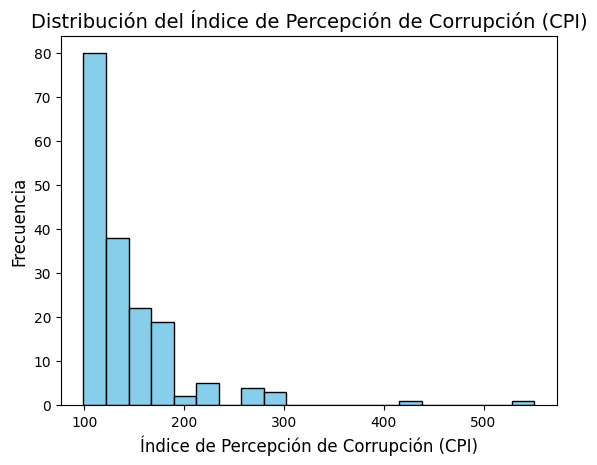

In [25]:
plt.hist(df['cpi'], bins=20, color='skyblue', edgecolor='black')  # Puedes ajustar 'bins' para cambiar la granularidad
plt.title('Distribución del Índice de Percepción de Corrupción (CPI)', fontsize=14)
plt.xlabel('Índice de Percepción de Corrupción (CPI)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

In [27]:
# 7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" 
# (emisiones de dióxido de carbono).

df['diferencia'] = abs(df['gdp'] - df['co2-emissions'])

In [28]:
# Calcular la desviación estándar de la diferencia
desviacion_estandar = df['diferencia'].std()

In [29]:
pais_mayor_diferencia = df.loc[df['diferencia'].idxmax()]

In [30]:
print(f"País con la mayor diferencia entre GDP y CO2 emissions: {pais_mayor_diferencia['country']}")
print(f"Diferencia: {pais_mayor_diferencia['diferencia']:.2f}")
print(f"Desviación estándar de las diferencias: {desviacion_estandar:.2f}")

País con la mayor diferencia entre GDP y CO2 emissions: Germany
Diferencia: 3845630030096.03
Desviación estándar de las diferencias: 521264610986.47


In [33]:
# 8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) 
# para todos los países.
# Calcular el porcentaje promedio de participación en la fuerza laboral
promedio_participacion = df['population_labor_force_participation'].mean()

print(f"El porcentaje promedio de participación en la fuerza laboral es: {promedio_participacion:.2f}%")


El porcentaje promedio de participación en la fuerza laboral es: 62.74%


In [ ]:
# 9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las 
# relaciones más destacadas.

In [35]:
# Seleccionar solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Calcular la matriz de correlación solo para las columnas numéricas
matriz_correlacion = df_numeric.corr()

Text(0.5, 1.0, 'Matriz de Correlación de las Variables Numéricas')

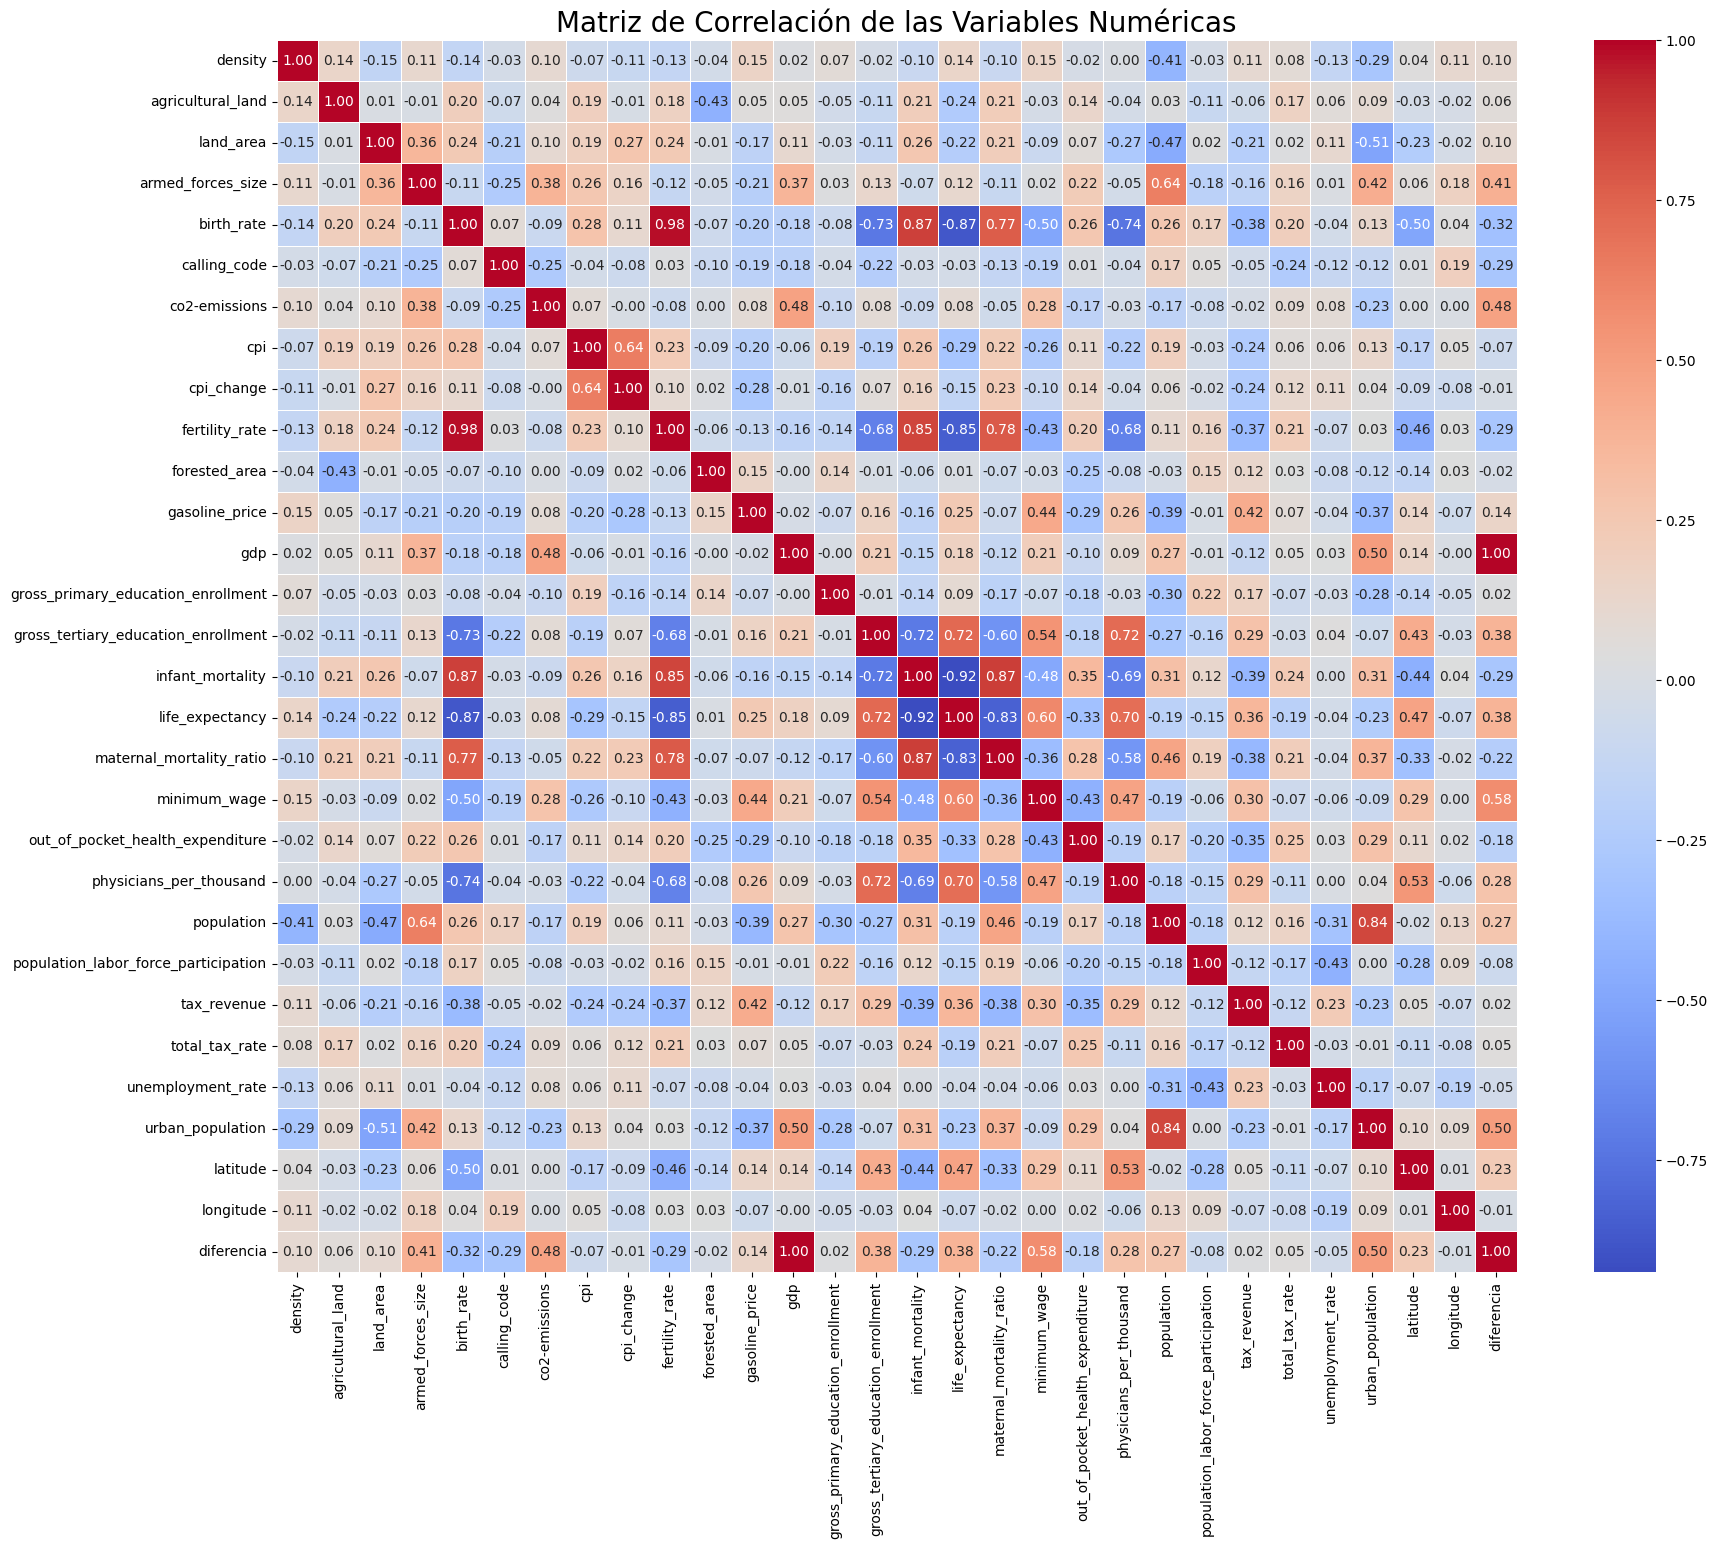

In [43]:
plt.figure(figsize=(20, 16))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación de las Variables Numéricas', fontsize=20)